<a href="https://colab.research.google.com/github/Ushus1/Data-Science-Projects/blob/main/Bank_Loan_Risk_Predication_using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough

In [ ]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Masters/Loan_dataset.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Masters/Loan_dataset.zip
  inflating: credit_test.csv         
  inflating: credit_train.csv        


In [ ]:
# # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('./credit_train.csv')

# Display top of dataframe
#credit.head()

In [ ]:
credit.shape

(100514, 19)

In [ ]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
# Statistics for each column
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
result = credit.dtypes
print(result)
print(credit.shape)

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object
(100514, 19)


In [ ]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [ ]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(credit)

# A curious thing about the table below is the last 10 features have the same number o missing values.
# I will go deeper and figure out what is happening.

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [ ]:
# Drop the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [ ]:
credit[credit['Years of Credit History'].isnull() == True]

# Here I can see that the last 514 observations are NaN values.

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [ ]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop them.

for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [ ]:
# As the number of missing values is so low in the 'Tax Liens' I will drop them.

for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [ ]:
# As the number of missing values is so low in the 'Bankruptcies' I will drop them.

for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)


Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


In [ ]:
# Now I will use the 'mean' technique to fill the NaN values.

credit.fillna(credit.mean(), inplace=True)
missing_values_table(credit)

# The feature 'Years in current job' didn't fill because has categorical values.

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Missing Values,% of Total Values
Years in current job,4222,4.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

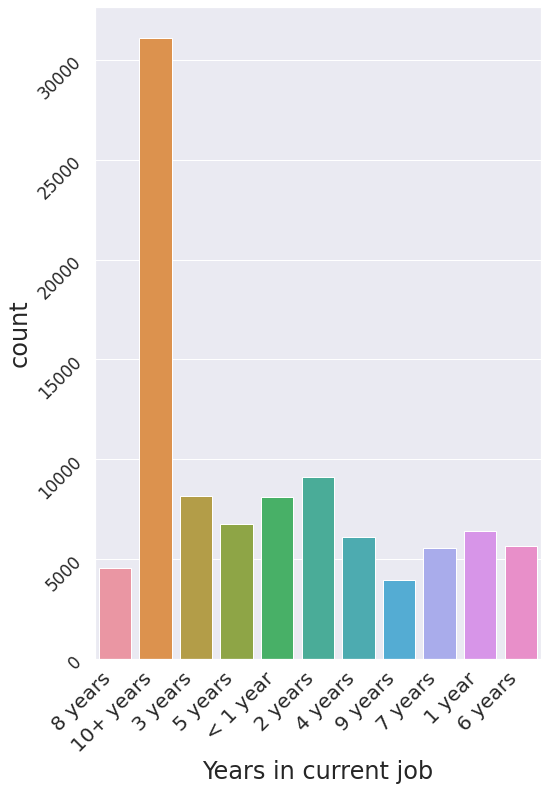

In [ ]:
# I will figure out what value is more present in this feature.

plt.figure(figsize=(8,12))

sns.countplot(credit['Years in current job'])
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# chart = sns.countplot(x="HostRamSize",data=df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.yticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

# We can see that the value '10+ years' is strongly present in this feature, so I will use this value to fill the 
# missing values.

In [ ]:
credit.fillna('10+ years', inplace=True) # fill with '10+ years'.
missing_values_table(credit)

# No missing values anymore.

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


dont run below >> takes time

In [ ]:
# # # Exploratory Data Analysis
# plt.figure(figsize=(30,40))
# sns.set_style("whitegrid")
# sns.set(font_scale = 1.25)
# sns.pairplot(credit)
# #sns.set_xlabel(fontsize = 8)
#sns.set_ylabel(fontsize = 8)
# We can see in this pairplot graph that this dataset is extremely concentraded is 'zero' value, so here I won't
# use the overfitting method.

In [ ]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [ ]:
# # # Feature Engineering and Selection

credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [ ]:
credit.shape

(99794, 45)

In [ ]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print(drops)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [ ]:
# Remove the collinear features above a specified correlation coefficient
credit = remove_collinear_features(credit, 0.6);

{'Home Ownership_Rent', 'Bankruptcies', 'Purpose_Take a Trip'}


In [ ]:
credit.shape

(99794, 42)

In [ ]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 41)
(19959, 41)
(79835, 1)
(19959, 1)


In [ ]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train

array([[-0.36102332, -0.29098075,  0.52858264, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35523419, -0.26165702,  0.48407171, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.357882  , -0.26165702, -0.35823972, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       ...,
       [-0.36101847, -0.27744672,  0.47657733, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.36255586, -0.25789757, -0.77726096, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35567642, -0.2556419 ,  0.1256506 , ..., -0.05147771,
        -0.03206516, -0.0343339 ]])

In [ ]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

In [ ]:
X_train.shape

(79835, 41)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
pca.fit(X_train)
pca.fit(X_test)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.components_

array([[ 3.18065850e-03, -8.24212315e-03, -1.51622188e-01, ...,
         1.48018716e-02,  1.12563127e-02,  9.26063562e-03],
       [-1.34152876e-02,  8.31193078e-03,  1.93259639e-01, ...,
        -1.72920960e-02, -1.41154667e-02, -1.14398252e-02],
       [ 2.67260974e-03, -1.01038652e-02,  4.23955015e-02, ...,
         5.49091801e-03,  1.42469220e-02, -8.06482705e-03],
       ...,
       [-4.29259651e-05, -1.05534177e-04,  1.66285654e-03, ...,
        -8.46303760e-02, -5.27442046e-02, -5.67579421e-02],
       [ 6.86590609e-17,  3.40380055e-17,  1.02554221e-16, ...,
         2.25514052e-17,  6.24500451e-17,  7.45931095e-17],
       [ 0.00000000e+00, -7.77538090e-18,  6.33636239e-17, ...,
        -6.93889390e-17,  2.01227923e-16, -6.93889390e-18]])

In [ ]:
# Variance Ratio
pca.explained_variance_ratio_

array([6.30475073e-02, 6.22580406e-02, 4.92780638e-02, 4.30525947e-02,
       4.22709445e-02, 3.46770377e-02, 3.31689769e-02, 2.95254383e-02,
       2.92736156e-02, 2.70608957e-02, 2.67869462e-02, 2.64356206e-02,
       2.60010662e-02, 2.57358365e-02, 2.55464212e-02, 2.52021497e-02,
       2.51346268e-02, 2.49397912e-02, 2.47193911e-02, 2.44047175e-02,
       2.42343513e-02, 2.40196260e-02, 2.37741408e-02, 2.32534618e-02,
       2.31733201e-02, 2.28473645e-02, 2.27448348e-02, 2.22636115e-02,
       2.17531430e-02, 2.07300681e-02, 1.92057112e-02, 1.83633038e-02,
       1.79276502e-02, 1.32926415e-02, 1.30137995e-02, 1.06763451e-02,
       7.80431870e-03, 2.19115335e-03, 2.11472409e-04, 1.24339284e-32,
       4.58506061e-34])

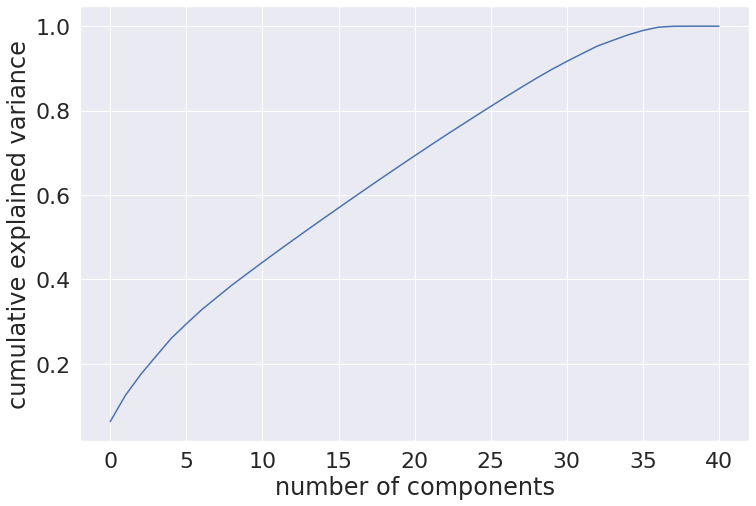

In [ ]:
#plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(79835, 41)
(79835,)


In [ ]:
X_train = pca_final.fit_transform(X_train)
X_test = pca_final.fit_transform(X_test)
X_train.shape

(79835, 30)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(79835, 30)
(19959, 30)


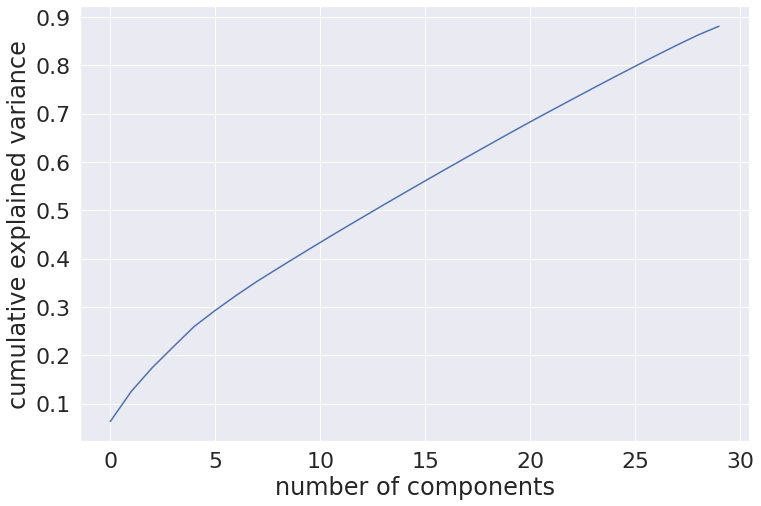

In [ ]:
#plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
# hopkins(df_pca)

train-rsme 0.0
r2-test 1.0
test-rsme 0.5670177189841301
r2-test -0.828758589576098


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

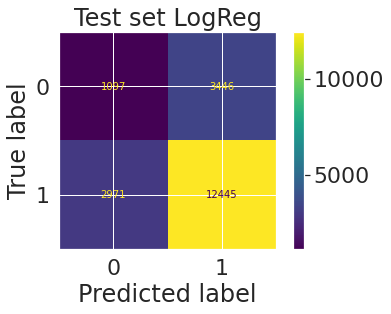

train-rsme 0.0
r2-test 1.0
test-rsme 0.4827813268028233
r2-test -0.32575735681907547


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

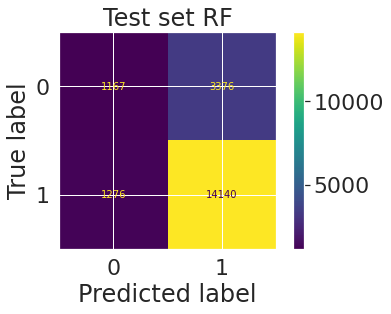

train-rsme 0.0
r2-test 1.0
test-rsme 0.5236526853521299
r2-test -0.5597313013479794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

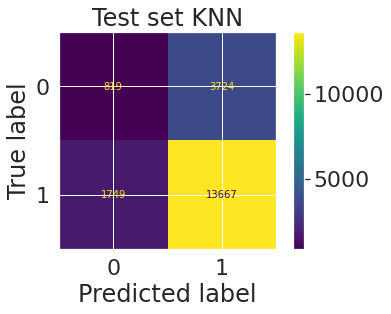

train-rsme 0.0
r2-test 1.0
test-rsme 0.6559970891482603
r2-test -1.4477493417280827


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

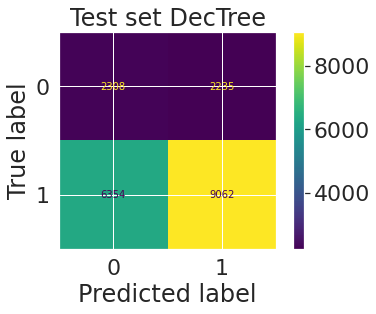

train-rsme 0.0
r2-test 1.0
test-rsme 0.48044061811471106
r2-test -0.3129329627827775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

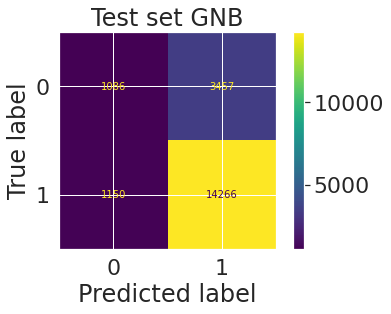

train-rsme 0.0
r2-test 1.0
test-rsme 0.438627870224296
r2-test -0.09434829109743115


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x576 with 0 Axes>

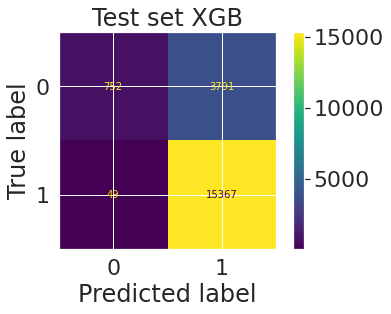

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# from sklearn.metrics import precision
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


import numpy as np
import pandas as pd
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
dfs = []
results = []

names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['Fully Paid', 'Charged off']
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('DecTree', DecisionTreeClassifier()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]

for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        # #Returns the mean squared error; we'll take a square root
        # print('RMSE training {}.format(name)',np.sqrt(mean_squared_error(X_train, y_train)))
        # # r_squared = r2_score(X_train, y_train)
        # print('r2', r2_score(X_train, y_train))
        y_pred = clf.predict(X_test)
        # print('RMSE training {}.format(name)',np.sqrt(mean_squared_error(X_train, X_test)))
        #print(name)
        #print(classification_report(y_test, y_pred, target_names=target_names))
        #training set performance
        # model_train_accuracy=accuracy_score(y_train,y_train_pred)
        # model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
        # model_train_precision=precision(y_train,y_train_pred)
        # model_train_recall=recall_score(y_train,y_train_pred)
        # model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

        # #test set performance
        # model_train_accuracy=accuracy_score(y_test,y_test_pred)
        # model_train_f1=f1_score(y_test,y_test_pred,average="weighted")
        # model_train_precision=precision(y_test,y_test_pred)
        # model_train_recall=recall_score(y_test,y_test_pred)
        # model_train_rocauc_score=roc_auc_score(y_test,y_test_pred)

        # # print(list(models.keys())[i])

        # print('{} Model Performance for training set'.format(name))
        # print( 'Accuracy : {:.4f}'.format(model_train_accuracy))
        # print(' F1 score : {:.4f}'.format(model_train_f1))
        # print( 'Precision : {:.4f}'.format(model_train_precision))
        # print(' Recall : {:.4f}'.format(model_train_recall))

        # Print ('---------------------')
        # print('{} Model Performance for test'.format(name))
        # print( 'Accuracy : {:.4f}'.format(model_test_accuracy))
        # print(' F1 score : {:.4f}'.format(model_test_f1))
        # print( 'Precision : {:.4f}'.format(model_test_precision))
        # print(' Recall : {:.4f}'.format(model_test_recall))
        y_train_pred = clf.predict(X_train)

        rse_train = metrics.mean_squared_error(y_train, y_train, squared=False)
        print('train-rsme',rse_train)
        r_squared = r2_score(y_train, y_train)
        print('r2-test',r_squared)
        rmse = metrics.mean_squared_error(y_test, y_pred , squared=False)
        print('test-rsme',rmse)
        r_squared = r2_score(y_test, y_pred)
        print('r2-test',r_squared)
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        # confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
        # plt.figure(figure=(6,8))
        plt.figure(figsize=(6,8))
        plot_confusion_matrix(clf, X_test, y_test)
        plt.title("Test set {}".format(name))
        plt.show()
        # metrics.plot_roc_curve(clf, X_test, y_test) 
        # plt.show()




final = pd.concat(dfs, ignore_index=True)
# return final

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
results_long_nofit.loc[results_long_nofit['model'] == 'RF']

,model,metrics,values
1166,RF,test_roc_auc,0.753185
1167,RF,test_roc_auc,0.753185
1156,RF,test_roc_auc,0.753185
1145,RF,test_roc_auc,0.753185
1165,RF,test_roc_auc,0.755396
...,...,...,...
444,RF,test_accuracy,0.813115
442,RF,test_accuracy,0.813115
440,RF,test_accuracy,0.813115
802,RF,test_recall_weighted,0.813115


In [ ]:
results_long_fit.loc[results_long_fit['model'] == 'RF']

,model,metrics,values
267,RF,score_time,0.947523
266,RF,score_time,0.947523
245,RF,score_time,0.947523
256,RF,score_time,0.947523
254,RF,score_time,0.955804
252,RF,score_time,0.955804
259,RF,score_time,0.955804
241,RF,score_time,0.955804
251,RF,score_time,0.959186
243,RF,score_time,0.959186


In [ ]:

results_long_nofit1 = results_long_nofit.copy(deep=True)
# print(results_long_nofit1.iloc(results_long_nofit1['model']=="RF"))
print(results_long_nofit1.head(40))

        model       metrics    values
1127      GNB  test_roc_auc  0.602315
1126      GNB  test_roc_auc  0.602315
1133      GNB  test_roc_auc  0.602315
1121      GNB  test_roc_auc  0.602315
1137      GNB  test_roc_auc  0.602315
1134      GNB  test_roc_auc  0.603496
1136      GNB  test_roc_auc  0.603496
1130      GNB  test_roc_auc  0.603496
1129      GNB  test_roc_auc  0.603496
1125      GNB  test_roc_auc  0.603496
1110      GNB  test_roc_auc  0.603496
1112      GNB  test_roc_auc  0.603496
1118      GNB  test_roc_auc  0.603496
1111      GNB  test_roc_auc  0.603619
1114      GNB  test_roc_auc  0.603619
1115      GNB  test_roc_auc  0.603619
1138      GNB  test_roc_auc  0.603619
1117      GNB  test_roc_auc  0.603619
1135      GNB  test_roc_auc  0.603619
1116      GNB  test_roc_auc  0.603619
1120      GNB  test_roc_auc  0.609473
1131      GNB  test_roc_auc  0.609473
1119      GNB  test_roc_auc  0.609473
1139      GNB  test_roc_auc  0.609473
1113      GNB  test_roc_auc  0.614051
1122      GN

In [ ]:
results_long_nofit1.loc[results_long_nofit1['model'] == 'RF']

,model,metrics,values
1166,RF,test_roc_auc,0.753185
1167,RF,test_roc_auc,0.753185
1156,RF,test_roc_auc,0.753185
1145,RF,test_roc_auc,0.753185
1165,RF,test_roc_auc,0.755396
...,...,...,...
444,RF,test_accuracy,0.813115
442,RF,test_accuracy,0.813115
440,RF,test_accuracy,0.813115
802,RF,test_recall_weighted,0.813115


In [ ]:
# inserting column with static value in data frame
D1=[['LR-TEST'		,0.6923		   ,0.6333		,	0.7314		,	0.9123	,	0.6712       ],
['KNN-TEST'		,0.6911		   , 0.6341,	0.7318		,	0.9087	,	0.5092       ],
['DT-TEST'		,0.5785		   , 0.5991,	 0.7603,	0.6145	,	0.5483       ],
['RF-TEST'		, 0.7253,	 0.6810,		 0.7547,0.9223,0.5605],
['GNB -TEST'	, 0.7255, 0.6955,0.7658,0.8971,0.5819],
['XGB  -TEST'	,	 0.7523,0.6740,0.7487,0.9929,0.5511],
['DNN- Test'	,0.81,0.80,	0.8,1 ,  0.65],
['PNN- Test'	,0.84,0.81,	0.83,1 ,  0.69]]

In [ ]:
D2=[['LogReg'		,0.567  ],
['KNN'		,0.523  ],
['Dec Tree'		,0.6559 ],
['RF'		,0.482  ],
['GNB' 	,0.4804 ],
['XGB'		,0.4386 ],
['DNN'	,0.4270 ],
['PNN'	,0.3870 ]]

In [ ]:
D1

[['LR-TEST', 0.6923, 0.6333, 0.7314, 0.9123, 0.6712],
 ['KNN-TEST', 0.6911, 0.6341, 0.7318, 0.9087, 0.5092],
 ['DT-TEST', 0.5785, 0.5991, 0.7603, 0.6145, 0.5483],
 ['RF-TEST', 0.7253, 0.681, 0.7547, 0.9223, 0.5605],
 ['GNB -TEST', 0.7255, 0.6955, 0.7658, 0.8971, 0.5819],
 ['XGB  -TEST', 0.7523, 0.674, 0.7487, 0.9929, 0.5511],
 ['DNN- Test', 0.81, 0.8, 0.8, 1, 0.65],
 ['PNN- Test', 0.84, 0.81, 0.83, 1, 0.69]]

In [ ]:
df1 = pd.DataFrame(D1, columns=['Model',	'Accuracy','f1 score', 	'Precision', 'Recall',	'ROC AUC'])
df1.set_index('Model', inplace=True)

In [ ]:

plt.figure(figsize=(8,12))

sns.countplot(df1['Model'])

KeyError: ignored

<Figure size 576x864 with 0 Axes>

In [ ]:
df1

,Accuracy,f1 score,Precision,Recall,ROC AUC
Model,,,,,
LR-TEST,0.6923,0.6333,0.7314,0.9123,0.6712
KNN-TEST,0.6911,0.6341,0.7318,0.9087,0.5092
DT-TEST,0.5785,0.5991,0.7603,0.6145,0.5483
RF-TEST,0.7253,0.6810,0.7547,0.9223,0.5605
GNB -TEST,0.7255,0.6955,0.7658,0.8971,0.5819
XGB -TEST,0.7523,0.6740,0.7487,0.9929,0.5511
DNN- Test,0.8100,0.8000,0.8000,1.0000,0.6500
PNN- Test,0.8400,0.8100,0.8300,1.0000,0.6900


Text(0, 0.5, 'Scoring')

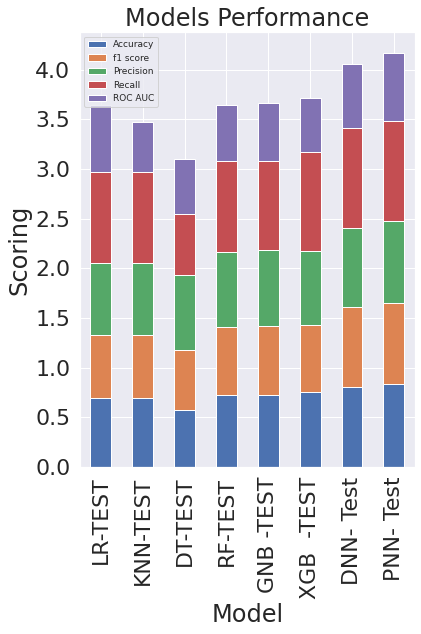

In [ ]:
df1.plot(kind='bar', stacked=True,figsize=(6, 8))
plt.title("Models Performance")
plt.legend(loc=2, prop={'size': 9})

plt.xlabel("Model",)

plt.ylabel("Scoring")

In [ ]:
D2=[['LogReg'		,0.567  ],
['KNN'		,0.523  ],
['Dec Tree'		,0.6559 ],
['RF'		,0.482  ],
['GNB' 	,0.4804 ],
['XGB'		,0.4386 ],
['DNN'	,0.4270 ],
['PNN'	,0.3870 ]]

In [ ]:
df2 = pd.DataFrame(D2, columns=['Model',	'RMSE'])
df2.set_index('Model', inplace=True)
df2

,RSME
Model,
LogReg,0.5670
KNN,0.5230
Dec Tree,0.6559
RF,0.4820
GNB,0.4804
XGB,0.4386
DNN,0.4270
PNN,0.3870


Text(0, 0.5, 'Scoring')

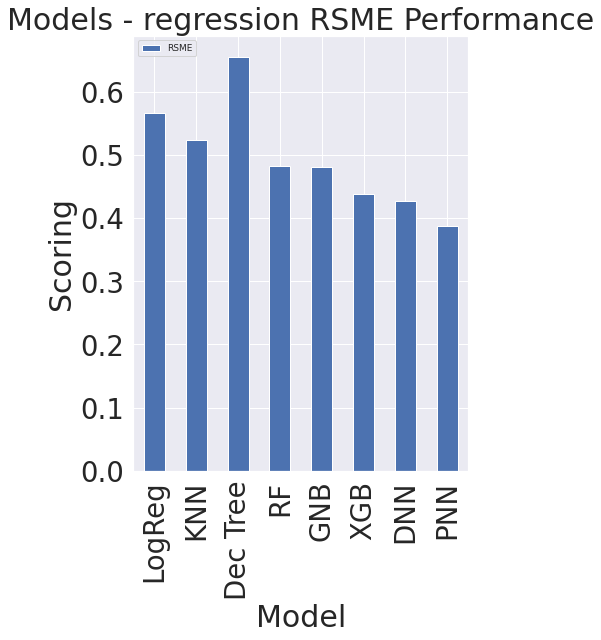

In [ ]:
df2.plot(kind='bar', stacked=True,figsize=(6, 8))
plt.title("Models - regression RMSE Performance")
plt.legend(loc=2, prop={'size': 9})

plt.xlabel("Model",)

plt.ylabel("Scoring")

Text(0, 0.5, 'Scoring')

<Figure size 576x864 with 0 Axes>

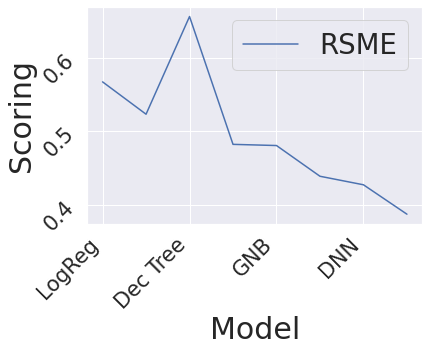

In [ ]:
plt.figure(figsize=(8,12))
df2.plot( 'Model' , 'RMSE' )
plt.legend(loc=2, prop={'size': 9})


plt.xlabel("Model")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)
plt.yticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)
plt.ylabel("Scoring")

In [ ]:
df2.plot(x='metrics',y='model')

TypeError: ignored

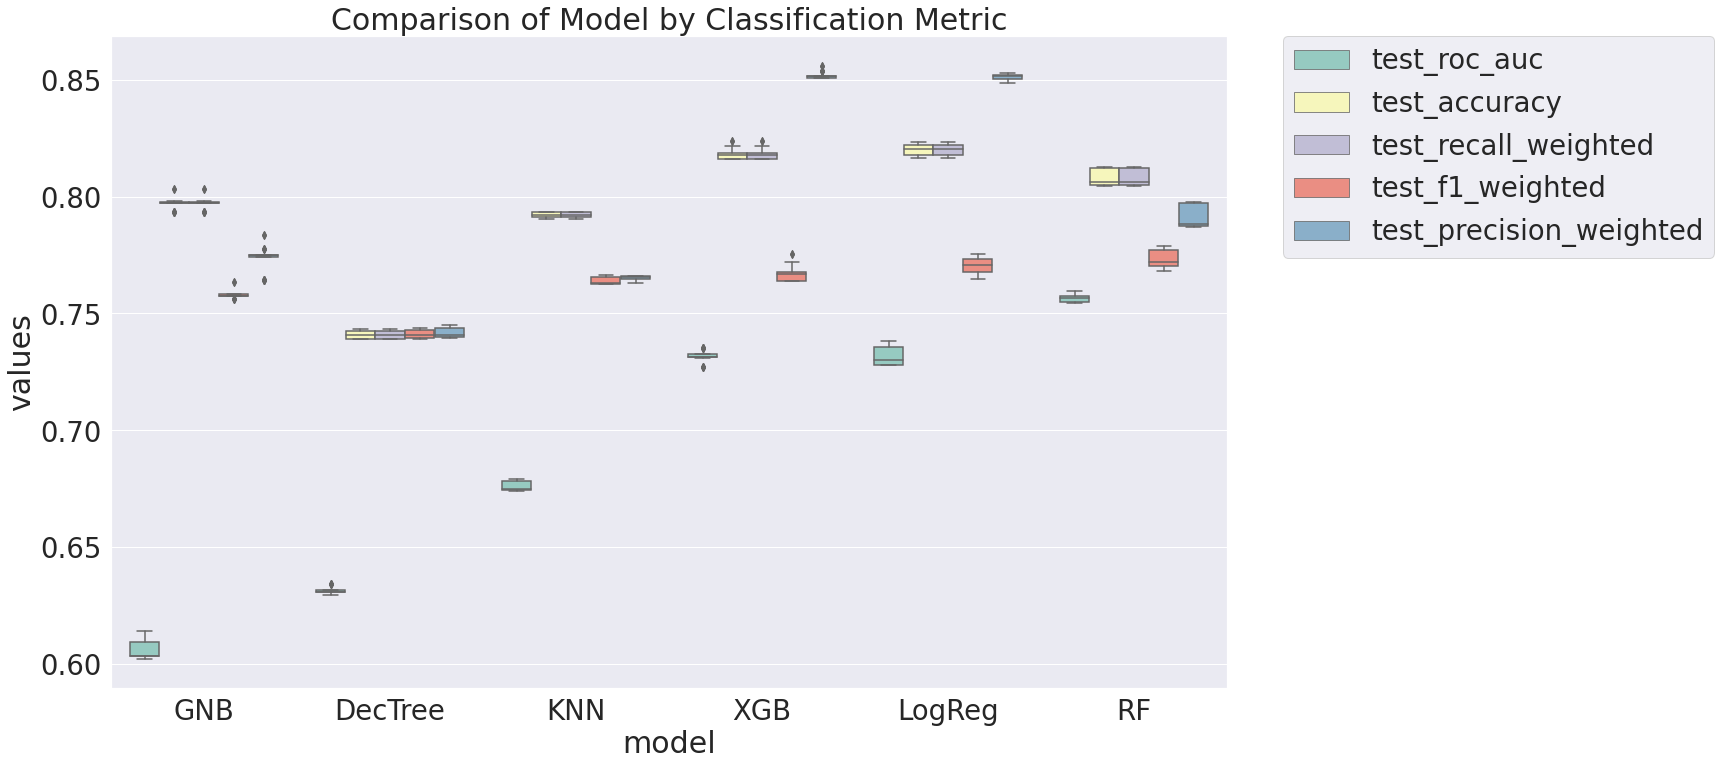

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [ ]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)



Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


In [ ]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(expected, predicted)
print(results)

In [ ]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

In [ ]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

In [ ]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

In [ ]:
# normal
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
DT_cross=fit_and_evaluate(Decision_Tree)
#scores = cross_val_score(Decision_Tree, X_train, y_train, cv=5, scoring='f1')
print('Normal Decision Tree Valdition F1:',DT_cross.mean())
print('Decision Classification Performance on the test set: Cross Validation Score = %0.4f' % DT_cross)

# # balenced
# dt_bal = DecisionTreeClassifier(max_depth = 8, class_weight='balanced')
# dt_bal.fit(X_train, y_train)
# scores = cross_val_score(dt_bal, X_train, y_train, cv=5, scoring='f1')
# print('Balanced class weights Decision Tree Valdition F1:',scores.mean())


# # weighted
# dt_wtd = DecisionTreeClassifier(class_weight= {0 : 10, 1 : 1})
# scores = cross_val_score(dt_wtd, X_train, y_train, cv=5, scoring='f1')
# dt_wtd.fit(X_train, y_train)
# print('10:1 class weights Decision Tree Valdition F1:',scores.mean())

# #gridsearch

# tree_param = {'criterion':['gini','entropy'],
#               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# gd_sr = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param,scoring='f1',cv=5,n_jobs=-1)
# gd_sr.fit(X_train, y_train)
# best_parameters = gd_sr.best_params_
# print('\n Best param after grid search', best_parameters)
# print('\n Best score after grid search', gd_sr.best_score_)

In [ ]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

#plt.style.use('fivethirtyeight')
plt.figsize=(10, 12)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradient Boosting', 'Decision Tree'],
                                 'score': [logr_cross, knn_cross, naive_cross, 
                                         random_cross, gb_cross, DT_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score',ascending = True).plot(x = 'model', y = 'score', kind = 'barh'
                                                          )

# Plot formatting
plt.ylabel('Accuracy Scores'); plt.yticks(size = 8); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 9)

plt.title('Model Comparison on Score', size = 12);

In [ ]:
model_comparison

In [ ]:
# # # Model Optimization

# # Hyperparameter

# Hyperparameter Tuning with Random Search and Cross Validation

# Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. 
# We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, 
# and then select the hyperparameters with the best performance.

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
# In the code below, we create the Randomized Search Object passing in the following parameters:

#    estimator: the model
#    param_distributions: the distribution of parameters we defined
#    cv the number of folds to use for k-fold cross validation
#    n_iter: the number of different combinations to try
#    scoring: which metric to use when evaluating candidates
#    n_jobs: number of cores to run in parallel (-1 will use all available)
#    verbose: how much information to display (1 displays a limited amount)
#    return_train_score: return the training score for each cross-validation fold
#    random_state: fixes the random number generator used so we get the same results every run

In [ ]:
# The Randomized Search Object is trained the same way as any other scikit-learn model. 
# After training, we can compare all the different hyperparameter combinations and find the best performing one.

# Create the model to use for hyperparameter tuning
model = XGBClassifier(random_state = 42)

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
#random_cv.fit(X_train, y_train)

In [ ]:
# Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. 
# Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.

# Get all of the cv results and sort by the test performance
#random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

#random_results.head(10)

In [ ]:
#random_cv.best_estimator_

In [ ]:
# The best gradient boosted model has the following hyperparameters:

# loss = ls
# n_estimators = 100
# max_depth = 5
# min_samples_leaf = 6
# min_samples_split = 2
# max_features = auto 

In [ ]:
# I will focus on a single one, the number of trees in the forest (n_estimators).
# By varying only one hyperparameter, we can directly observe how it affects performance. 
# In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.

# Here we will use grid search with a grid that only has the n_estimators hyperparameter. 
# We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. 
# We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(loss='ls', max_depth=5,
                                     max_features='auto', min_samples_leaf=6,
                                     min_samples_split=2, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

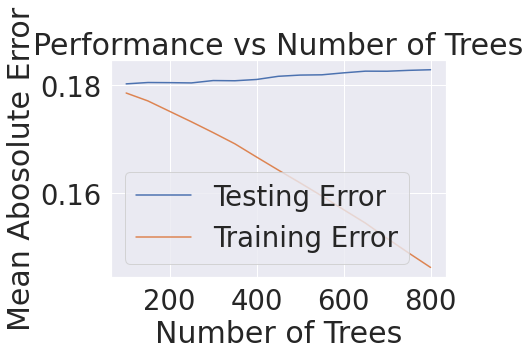

In [ ]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize=(8, 8)
#plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, 
# we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization.

# For now, we will use the model with the best performance and accept that it may be overfitting to the training set.

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Current Loan Amount             99794 non-null  float64
 1   Credit Score                    99794 non-null  float64
 2   Annual Income                   99794 non-null  float64
 3   Monthly Debt                    99794 non-null  float64
 4   Years of Credit History         99794 non-null  float64
 5   Number of Open Accounts         99794 non-null  float64
 6   Number of Credit Problems       99794 non-null  float64
 7   Current Credit Balance          99794 non-null  float64
 8   Maximum Open Credit             99794 non-null  float64
 9   Tax Liens                       99794 non-null  float64
 10  Term_Long Term                  99794 non-null  uint8  
 11  Term_Short Term                 99794 non-null  uint8  
 12  Years in current job_1 year     

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
	# create model
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
    # classifier.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
    # model.compile(optimizer='adam',
    #             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    #             metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
SHUFFLE_BUFFER = 500
# load dataset
# dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = credit.iloc[:,0:41]
Y = credit.iloc[:,41]
print(X.shape)
print(Y.shape)
# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(99794, 41)
(99794,)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 767, in fit
    **kwargs,
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers

AttributeError: ignored

In [ ]:
#results.sort_values('mean_test_score', ascending = False).head(5)

In [ ]:
# # # Evaluate Final Model on the Test Set

# We will use the best model from hyperparameter tuning to make predictions on the testing set.

# For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

# Default model
default_model = XGBClassifier(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

In [ ]:
#%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

In [ ]:
#%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine). 

# Here, the increase in run time is not an impediment, because while the relative difference is very small, the absolute magnitude of the training time is not significant. 
# In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

In [ ]:
# To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

figsize=(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

# The distribution looks to be nearly the same.

In [ ]:
# Another diagnostic plot is a histogram of the residuals. 
# Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# The residuals are very close to zero value, with a one noticeable outliers on the low end. 
# These indicate errors where the model estimate was far below that of the true value.

In [ ]:
model.fit(X_train, y_train)

In [ ]:
!pip install xgboost==0.4a30

In [ ]:
model.feature_importances

In [ ]:
# # # Feature Importances

# One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. 
# These can be interpreted as the variables which are most predictive of the target.

# Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. 
# We will store the feature importances in a dataframe to analyze and visualize them.

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

# The Credit Score, Current Loan Amount and Annual Income are the three most important features by quite a large margin. After that, Maximum Open Credit, Monthly Debt and Years of Credit History have
# almost the same importance and, Home Ownership_Home Mortgage and Term_Long Term have almost the same importance as well. It indicates that we might not need to retain all of the features 
# to create a model with nearly the same performance.

In [ ]:
# Let's graph the feature importances to compare visually.

figsize=(12, 15)
#plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh',legend=None);
    
plt.xlabel('Relative Importance', size = 10); 
plt.ylabel('Feature',size=10)
plt.title('Feature Importances from Random Forest', size = 12);

In [ ]:
# # Use Feature Importances for Feature Selection

# Given that not every feature is important for finding the score, what would happen if we used a simpler model, such as a logistic regression, with the subset of most important features from the 
# random forest? The logistic regression did outperform the baseline, but it did not perform well compared to the model complex models. 
# Let's try using only the 6 most important features in the logistic regression to see if performance is improved. We can also limit to these features and re-evaluate the random forest.

# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

In [ ]:
logr = LogisticRegression()

# Fit on full set of features
logr.fit(X_train, y_train)
logr_full_pred = logr.predict(X_test)

# Fit on reduced set of features
logr.fit(X_train_reduced, y_train)
logr_reduced_pred = logr.predict(X_test_reduced)

# Display results
print('Logistic Regression Full Results: MAE =    %0.4f.' % mae(y_test, logr_full_pred))
print('Logistic Regression Reduced Results: MAE = %0.4f.' % mae(y_test, logr_reduced_pred))

# Well, reducing the features did improve the linear regression results little beat! 
# It turns out that the extra information in the features with soft importance do actually improve performance.

In [ ]:
# Let's look at using the reduced set of features in the gradient boosted regressor. How is the performance affected?

# Create the model with the same hyperparamters
model_reduced = XGBClassifier(loss='ls', max_depth=5, max_features='auto',
                                  min_samples_leaf=6, min_samples_split=2, 
                                  n_estimators=450, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

# The model results are slightly worse with the reduced set of features and we will keep all of the features for the final model.

In [ ]:
# # Locally Interpretable Model-agnostic Explanations (LIME)

# We will look at using LIME to explain individual predictions made the by the model. 
#LIME is a relatively new effort aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

# We will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct. 
#We will restrict ourselves to using the reduced set of 10 features to aid interpretability. 
#The model trained on the 10 most important features is slightly less accurate, but we generally have to trade off accuracy for interpretability!

In [ ]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [ ]:
!pip install lime

In [ ]:
# Create a lime explainer object

# LIME for explaining predictions
import lime 
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

In [ ]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict_proba,
                                      num_features=10)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# In this example, our gradient boosted model predicted a score of 1.0 and the actual value was 0.0.

# The plot from LIME is showing us the contribution to the final prediction from each of the features for the example.

# We can see that the Credit Score singificantly decreased the prediction when we comparing with the others. 
# The Maximum Open Credit on the other hand, incresed the prediction when we comparing with the others.

In [ ]:
# Now we can go through the same process with a prediction the model got correct.

# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict_proba, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# The correct value for this case was 1.0 which our gradient boosted model got right on!

# The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example.

# Observing break down plots like these allow us to get an idea of how the model makes a prediction. 
# This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model 
# to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually.

In [ ]:
# A process such as this where we try to work with the machine learning algorithm to gain understanding of a problem seems much better than simply letting the model make predictions
# and completely trusting them! Although LIME is not perfect, it represents a step in the right direction towards explaining machine learning models.

In [ ]:
# Good job with this project!
# See you in the next one!!!

In [ ]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough